# EDA of Nike and Adidas Products

Importing all libraries needed for this data exploratory 

In [261]:
import numpy as np
import pandas as pd
import folium as fl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Geting the files from directory or files in the folder

In [3]:
df_original = pd.read_csv("Adidas Vs Nike.csv")
df_original.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


## Understanding the Data

### this part to understand and clean the data to be ready to be analysed 

In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
 9   Last Visited   3268 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB


In [6]:
df_original.describe(include="O")

,Product Name,Product ID,Brand,Description,Last Visited
count,3268,3268,3268,3265,3268
unique,1531,3179,5,1762,318
top,Men's adidas Originals Supercourt Shoes,CD6720-808,Adidas CORE / NEO,A well cushioned shoe with a fresher look that...,2020-04-13T15:06:32
freq,16,3,1111,15,38


In [7]:
df_original.nunique()

Product Name     1531
Product ID       3179
Listing Price      78
Sale Price        227
Discount            6
Brand               5
Description      1762
Rating             32
Reviews           102
Last Visited      318
dtype: int64

In [5]:
df_original.isna().sum()

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Description      3
Rating           0
Reviews          0
Last Visited     0
dtype: int64

#### After looking at summary of null value from our data, it shown that "description" columns have 3 null value. it then will be drop becasue will not use the columns even though there's no null value.

In [9]:
df_original = df_original.drop(columns=["Description"])
df_original.head()


,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72,2020-04-13T15:06:15


In [10]:
df_original["Brand"].unique()

array(['Adidas Adidas ORIGINALS', 'Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

### from the unique values from "Brand" column it found that there's a duplicate for adidas original with using 2 adidas, then it will be replaced by to correct format which is Adidas ORIGINALS

In [17]:
df_original = df_original.replace("Adidas Adidas ORIGINALS", "Adidas ORIGINALS")
df_original.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72,2020-04-13T15:06:15


In [18]:
df_original["Brand"].unique()

array(['Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

### It is now have 4 unique values for "Brand" Column"

In [27]:
df_original.drop_duplicates(inplace=True)

In [28]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3268 entries, 0 to 3267
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Rating         3268 non-null   float64
 7   Reviews        3268 non-null   int64  
 8   Last Visited   3268 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 255.3+ KB


### the data doesn't have a duplicate value or row as it shown same count

In [26]:
df_original.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


### Table above shown all the numeric information of the data including count, mean, standart deviation, min value, interquartile value, max value

## Analysis 

### in this section the data now will be analyse after it been cleaned and ready to analyse.

In [29]:
df_original.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas ORIGINALS,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72,2020-04-13T15:06:15


### the price in listing, and sale price needto be corrected as it in USD

In [30]:
df_original[['Listing Price', 'Sale Price']]=df_original[['Listing Price' , 'Sale Price']].apply(lambda x: x/100)
df_original.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,149.99,74.99,50,Adidas ORIGINALS,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,75.99,37.99,50,Adidas ORIGINALS,3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,9.99,5.99,40,Adidas CORE / NEO,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,69.99,34.99,50,Adidas CORE / NEO,4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,79.99,39.99,50,Adidas ORIGINALS,3.5,72,2020-04-13T15:06:15


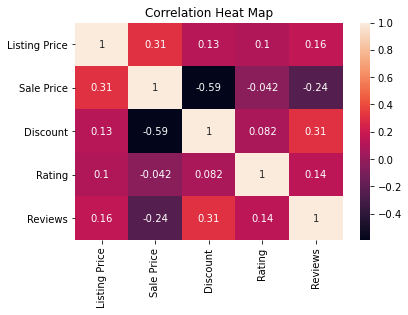

In [254]:
sns.heatmap(df_original.corr(), annot=True)
plt.title("Correlation Heat Map")
plt.show()

In [167]:
df_original.describe().round(2)

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.00,3268.00,3268.00,3268.00,3268.00
mean,68.68,61.34,26.88,3.24,40.55
std,47.25,42.93,22.63,1.43,31.54
min,0.00,4.49,0.00,0.00,0.00
25%,42.99,29.99,0.00,2.60,10.00
50%,59.99,47.99,40.00,3.50,37.00
75%,89.99,79.95,50.00,4.40,68.00
max,299.99,365.00,60.00,5.00,223.00


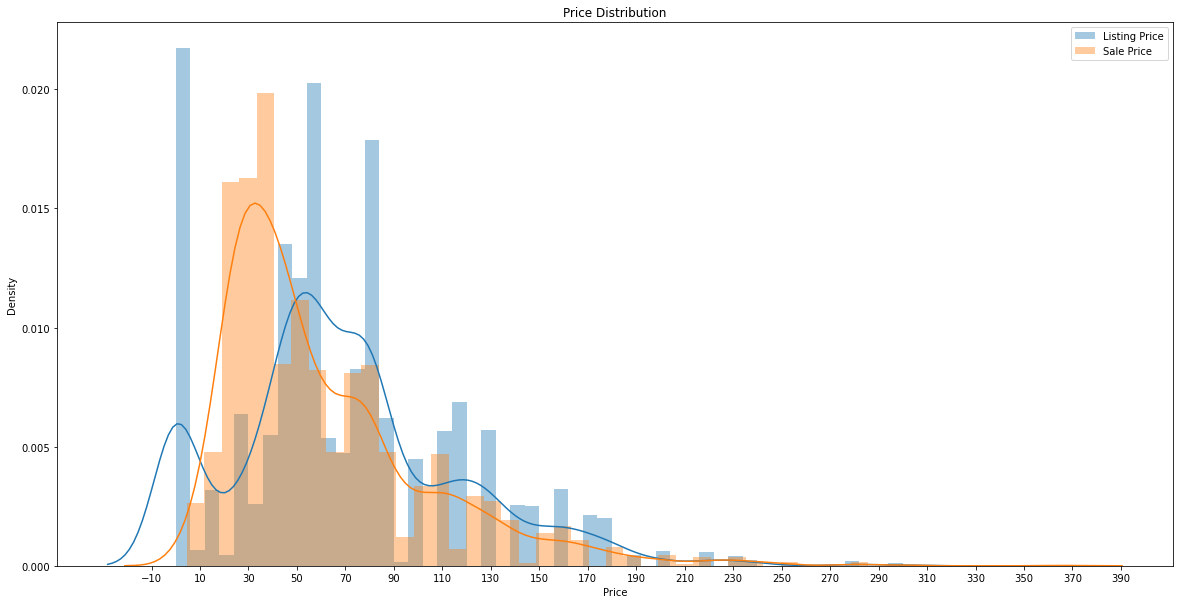

In [262]:
plt.figure(figsize= (20,10))
plt.xticks(np.arange(-10,400,step = 20))
listing_Price = df_original['Listing Price']
sns.distplot(listing_Price, bins=50, label = 'Listing Price')
plt.title("Distribution Price")
price = df_original['Sale Price']
sns.distplot(price, bins=50, label='Sale Price')
plt.title('Price Distribution')
plt.legend()
plt.xlabel('Price')
plt.show()

### Accross all of the brand their distribution of listing price is between 40 to 90 USD and the sale price is between 20 to 60 USD Dollar

In [186]:
df_brand = df_original[["Brand","Product ID", "Rating","Reviews"]].groupby(by = "Brand", as_index=False).agg({'Product ID': "count",'Rating': "mean" , "Reviews" : "sum"})
df_brand

,Brand,Product ID,Rating,Reviews
0,Adidas CORE / NEO,1111,3.412331,53556
1,Adidas ORIGINALS,908,3.323568,44744
2,Adidas SPORT PERFORMANCE,606,3.346205,29605
3,Nike,643,2.734837,4618


### Adidas have more than 2000 product combine while Nike only have 643 product

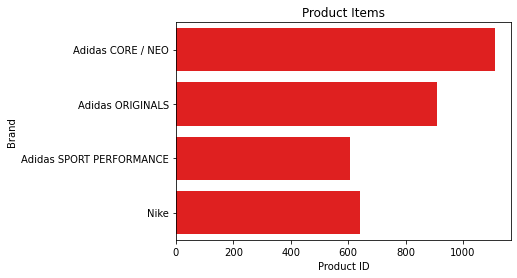

In [231]:
sns.barplot(x = "Product ID" , y = "Brand", data = df_brand, color = 'red')
plt.title("Product Items")
plt.show()

In [245]:
df_brand1 = df_original[["Brand","Listing Price", "Sale Price"]].groupby(by = "Brand", as_index=False).agg({'Listing Price': "mean",'Sale Price': "mean" , }).round(2)
df_brand1

,Brand,Listing Price,Sale Price
0,Adidas CORE / NEO,49.52,31.16
1,Adidas ORIGINALS,98.20,68.12
2,Adidas SPORT PERFORMANCE,91.32,63.23
3,Nike,38.76,102.14


### as seen from the table above Nike has an average sale price of 102.14 USD that almost 2 times higher than its competitor, while adidas CORE/NEO has the lowest average sales price, and for listing price between these 4 Brands Adidas Originals have highest value of price with 98.20 USD

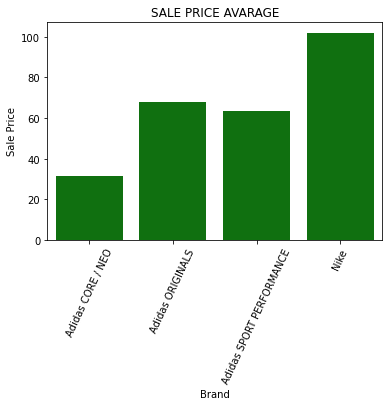

In [253]:
sns.barplot(x = "Brand" , y = "Sale Price", data = df_brand1, color = 'green')
plt.title("SALE PRICE AVARAGE")
plt.xticks(rotation=65)
plt.show()

In [247]:
df_brand3 = df_original[["Brand","Product ID", "Rating",]].groupby(by = "Brand", as_index=False).agg({'Product ID': "count",'Rating': "mean" })
df_brand3

,Brand,Product ID,Rating
0,Adidas CORE / NEO,1111,3.412331
1,Adidas ORIGINALS,908,3.323568
2,Adidas SPORT PERFORMANCE,606,3.346205
3,Nike,643,2.734837


## it shown the rating for each brand that we anlyse that Adidas CORE/NEO has the highest rating value, while Nike has the lowest rating value. from it's rating it can be use a parameter of customer satisfaction. but before that let us analyse more detailed 

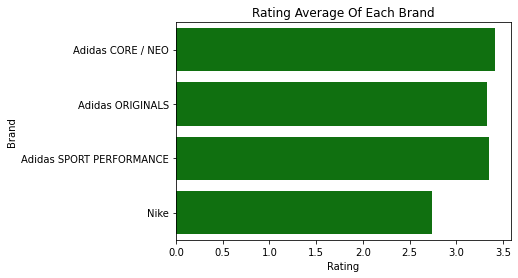

In [232]:
sns.barplot(x = "Rating" , y = "Brand", data = df_brand, color = 'green')
plt.title("Rating Average Of Each Brand")
plt.show()

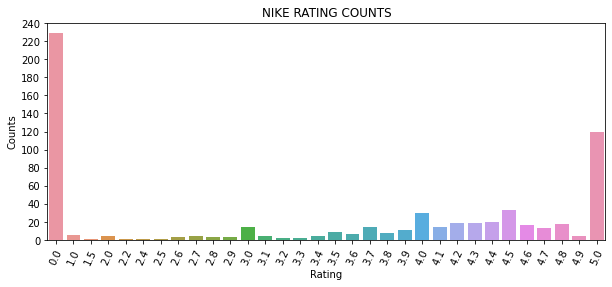

In [250]:

Rating_Dist = df_original[df_original["Brand"] == "Nike"].Rating.value_counts()

plt.figure(figsize=(10, 4))
plt.yticks(np.arange(0,400,step = 20))
plt.title("NIKE RATING COUNTS")

sns.barplot(x=Rating_Dist.index, y=Rating_Dist.values)
plt.xticks(rotation=65)
plt.xlabel('Rating')

plt.ylabel('Counts')

plt.show()

## As it shown before that nike rating is below all other brands, but if we take a look details in NIKE data it shown from the graph above. Nike has a lot of 0 rating or we can asume that is either it is a true rating from customer or count as hasn't been rate. 

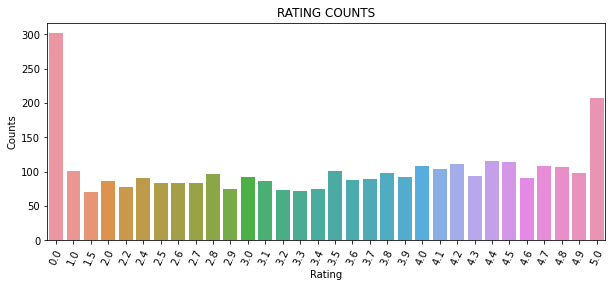

In [251]:
Rating_Dist = df_original.Rating.value_counts()

plt.figure(figsize=(10, 4))
plt.title("RATING COUNTS")

sns.barplot(x=Rating_Dist.index, y=Rating_Dist.values)
plt.xticks(rotation=65)
plt.xlabel('Rating')

plt.ylabel('Counts')

plt.show()

## if we take a look at all brand rating counts as it shown that 230 of all 300 count for 0 rating comes from NIKE, it is only 70 counts on 0 rating comes from all other brand. Even for the 5.0 rating it is majority comes from Nike as it compared from Rating Counts graph and Nike Rating Counts

## we will try to take a look at a data where all zero is droped to see how it shown the rating between all the brand 

In [243]:
df_Rating = df_original[df_original["Rating"] != 0]
df_Rating

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,149.99,74.99,50,Adidas ORIGINALS,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,75.99,37.99,50,Adidas ORIGINALS,3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,9.99,5.99,40,Adidas CORE / NEO,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,69.99,34.99,50,Adidas CORE / NEO,4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,79.99,39.99,50,Adidas ORIGINALS,3.5,72,2020-04-13T15:06:15
...,...,...,...,...,...,...,...,...,...
3261,Kyrie 6 'Enlightenment',BQ4630-500,109.95,87.97,0,Nike,4.4,10,2020-04-13T15:40:56
3262,Nike React Metcon AMP,CT9155-063,0.00,139.95,0,Nike,3.0,1,2020-04-13T15:40:58
3263,Air Jordan 8 Retro,CI1236-100,159.95,127.97,0,Nike,5.0,1,2020-04-13T15:41:01
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,84.95,59.47,0,Nike,5.0,1,2020-04-13T15:41:07


In [246]:
df_brand2 = df_Rating[["Brand","Product ID", "Rating",]].groupby(by = "Brand", as_index=False).agg({'Product ID': "count",'Rating': "mean" })
df_brand2

,Brand,Product ID,Rating
0,Adidas CORE / NEO,1084,3.497325
1,Adidas ORIGINALS,876,3.444977
2,Adidas SPORT PERFORMANCE,592,3.425338
3,Nike,414,4.247585


## here it shown from table above that Nike rating is shifted to 4,2% as all the 0 value rating been droped, while all the adidas brands didn't change much. it can be assume that it represent more to the actual review to show brands satisfaction.

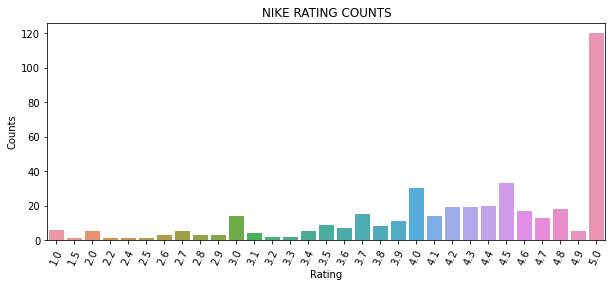

In [249]:

Rating_Dist1 = df_Rating[df_Rating["Brand"] == "Nike"].Rating.value_counts()

plt.figure(figsize=(10, 4))
plt.yticks(np.arange(0,400,step = 20))
plt.title("NIKE RATING COUNTS")

sns.barplot(x=Rating_Dist1.index, y=Rating_Dist1.values)
plt.xticks(rotation=65)
plt.xlabel('Rating')

plt.ylabel('Counts')

plt.show()

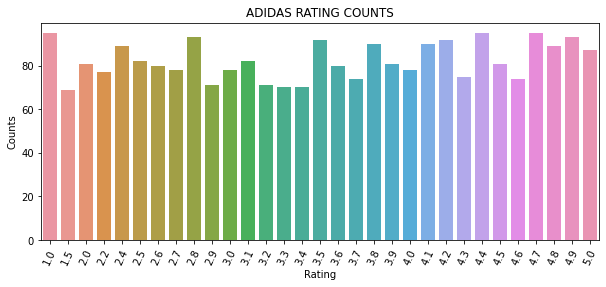

In [260]:
Rating_Dist1 = df_Rating[df_Rating["Brand"] != "Nike"].Rating.value_counts()

plt.figure(figsize=(10, 4))
plt.yticks(np.arange(0,400,step = 20))
plt.title("ADIDAS RATING COUNTS")

sns.barplot(x=Rating_Dist1.index, y=Rating_Dist1.values)
plt.xticks(rotation=65)
plt.xlabel('Rating')

plt.ylabel('Counts')

plt.show()

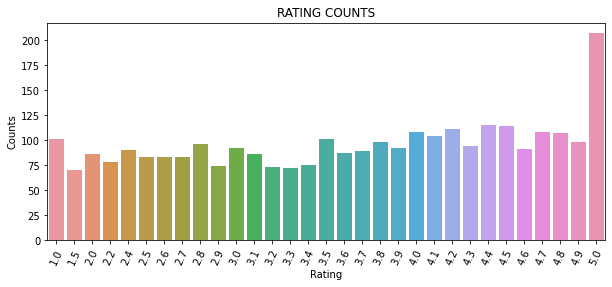

In [252]:
Rating_Dist1 = df_Rating.Rating.value_counts()

plt.figure(figsize=(10, 4))
plt.title("RATING COUNTS")

sns.barplot(x=Rating_Dist1.index, y=Rating_Dist1.values)
plt.xticks(rotation=65)
plt.xlabel('Rating')

plt.ylabel('Counts')

plt.show()

In [259]:
df_brand3 = df_Rating[["Brand","Product ID", "Rating","Reviews"]].groupby(by = "Brand", as_index=False).agg({'Product ID': "count",'Rating': "mean", "Reviews" : "sum" })
df_brand3

,Brand,Product ID,Rating,Reviews
0,Adidas CORE / NEO,1084,3.497325,52243
1,Adidas ORIGINALS,876,3.444977,43200
2,Adidas SPORT PERFORMANCE,592,3.425338,28997
3,Nike,414,4.247585,4618


## CONCLUSION

### Nike shown a better performace than Adidas and assumed that it rflected customer satifaction that even though nike selling a less product, but their customer feel more satiesfied with their product. as it analyse before it compared that Nike has higher sale price that any Adidas brand but it didn't affected customer satisfaction. it this analysis that adidas sell more product and also offer more product to their customer with lower price than NIKE. it then conclude that adidas sell a lot of producta across their brand that beat nike in terms of quantity, while Nike offer a lesser product than adidas with better quality as we assume it reflected from their customer rating review beat Adidas in terms of quality.

Thank You

Fabian Nasution

In [263]:
brand = df_original["Brand"]
brand

0        Adidas ORIGINALS
1        Adidas ORIGINALS
2       Adidas CORE / NEO
3       Adidas CORE / NEO
4        Adidas ORIGINALS
              ...        
3263                 Nike
3264                 Nike
3265                 Nike
3266                 Nike
3267                 Nike
Name: Brand, Length: 3268, dtype: object

In [280]:
Rating = df_Rating["Rating"]

In [269]:
Rating2 = df_["Rating"].value_counts

<AxesSubplot:xlabel='Rating', ylabel='count'>

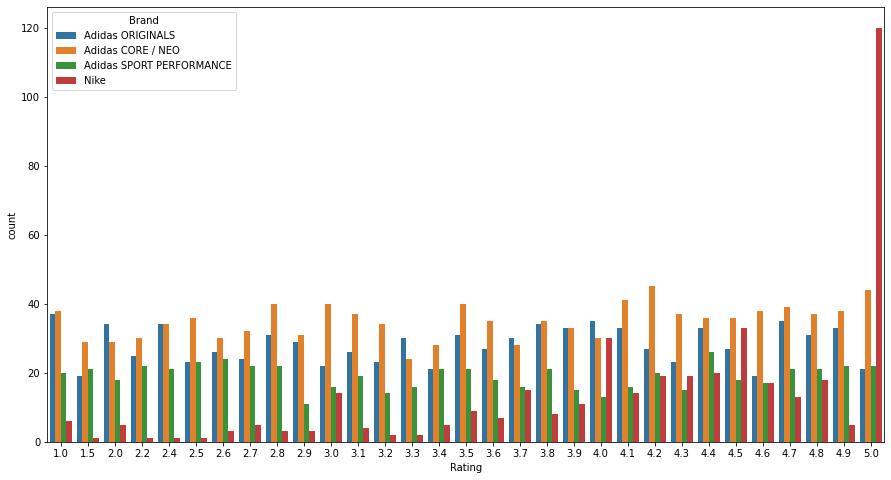

In [282]:
plt.figure(figsize=(15, 8))
sns.countplot(x= Rating, hue= brand , data=df_Rating)